# ggplot2
### Mapping
+ 시각적 요소
+ 그래프를 시각적으로 인식할 때 필요한 요소
+ 산점도이 경우, 점의 위치, 크기, 코양 및 색깔 등이 시각적 요소


### 시각적 요소의 mapping과 setting
+ mapping : 데이터의 값과 연결되어 결정. 함수aes()안에서 연결
+ setting : 사용자가 일정한 값을 지정. 함수aes()밖에서 결정

+ mapping은 기존의 그래프에 다른변수의 정보를 추가 할 수 있다

In [2]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.5.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.2.1     √ purrr   0.3.3
√ tibble  2.1.3     √ dplyr   0.8.4
√ tidyr   1.0.2     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.4.0

Warning message:
"package 'ggplot2' was built under R version 3.5.3"
Warning message:
"package 'tibble' was built under R version 3.5.3"
Warning message:
"package 'tidyr' was built under R version 3.5.3"
Warning message:
"package 'readr' was built under R version 3.5.3"
Warning message:
"package 'purrr' was built under R version 3.5.3"
Warning message:
"package 'dplyr' was built under R version 3.5.3"
Warning message:
"package 'stringr' was built under R version 3.5.3"
Warning message:
"package 'forcats' was built under R version 3.5.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



+ 변수 class를 시각적 요소 color와 mapping
+ 변수 drv를 시각적요소 shape와 mapping
+ 변수 cyl을 시각적 요소 size와 mapping
+ 여러 시각적 요소를 동시에 mapping

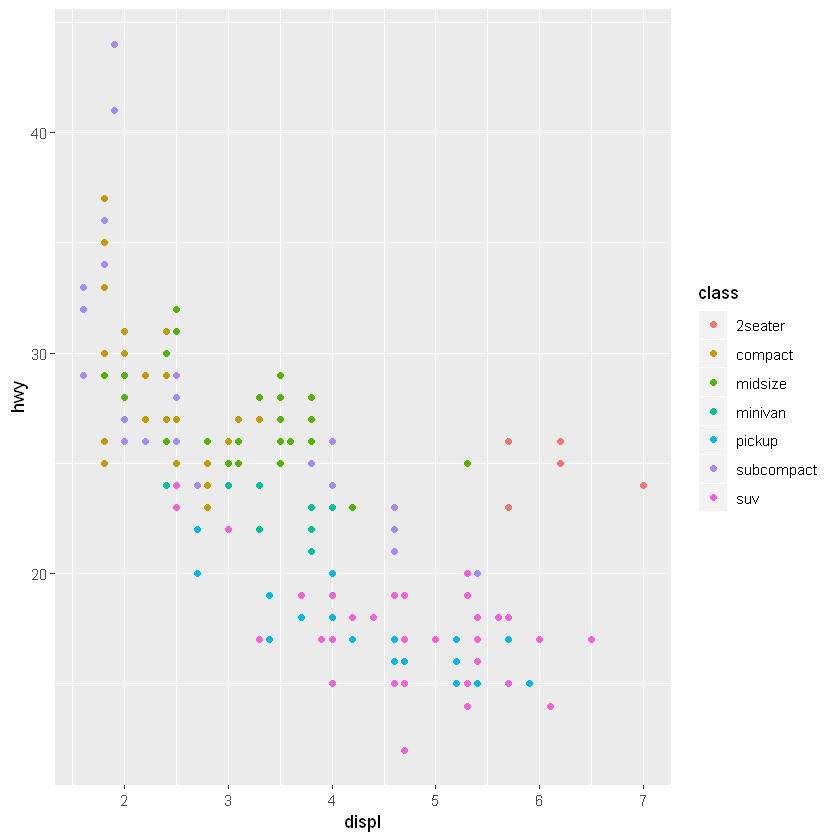

In [6]:
ggplot(data=mpg) + geom_point(mapping=aes(x=displ, y=hwy, color=class))

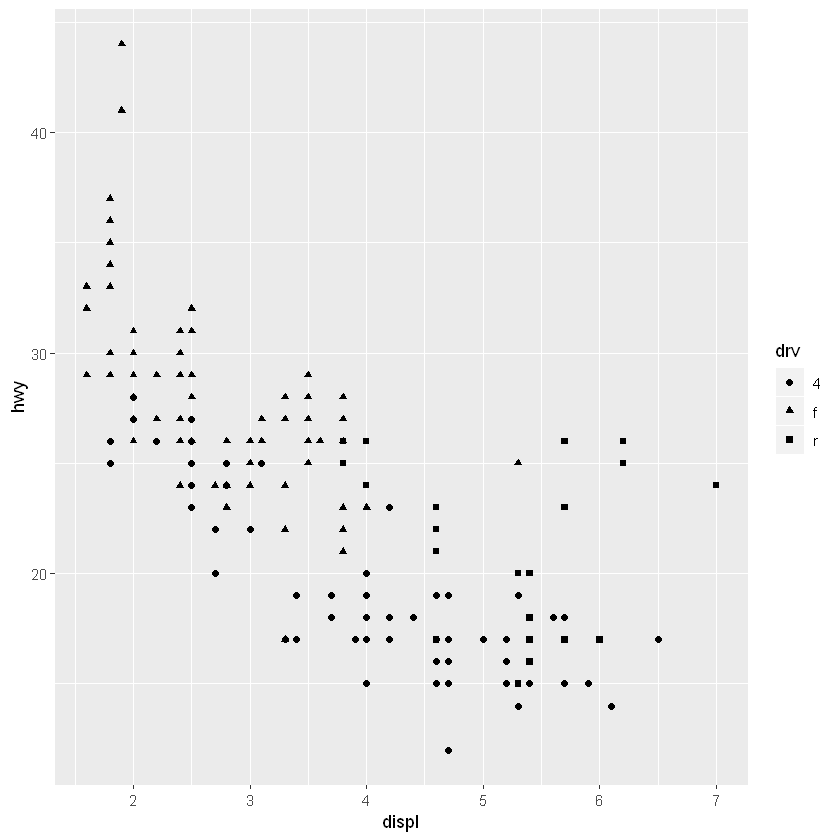

In [7]:
ggplot(data=mpg) + 
  geom_point(mapping=aes(x=displ, y=hwy, shape=drv))

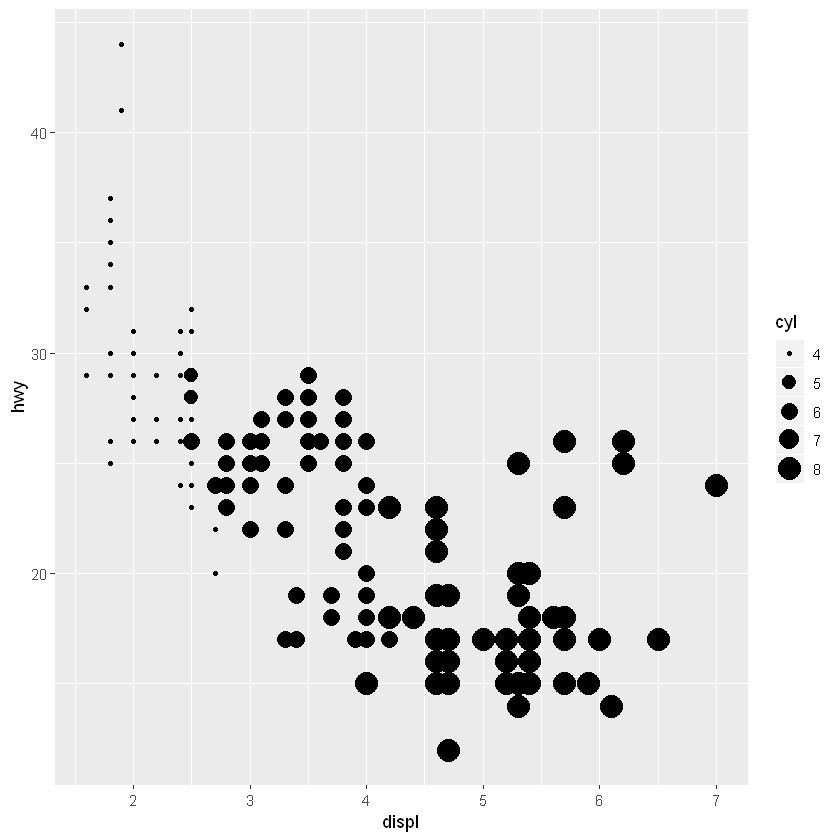

In [8]:
ggplot(data= mpg) +
  geom_point(mapping=aes(x=displ, y=hwy, size=cyl))

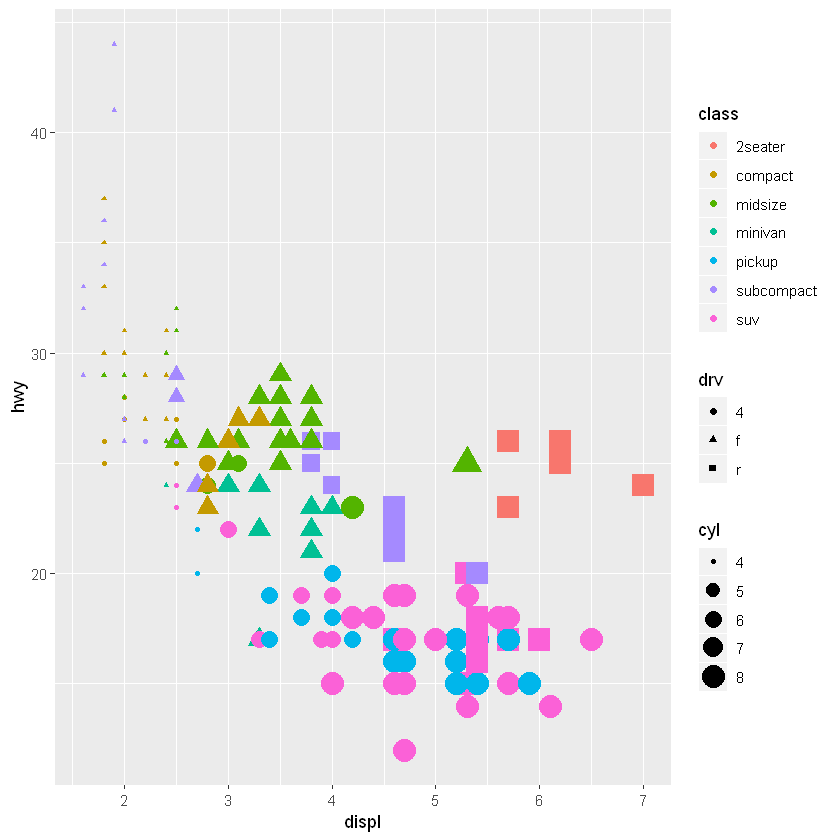

In [9]:
ggplot(data =mpg) +
  geom_point(mapping=aes(x=displ, y=hwy, color=class,
                         shape=drv, size=cyl))

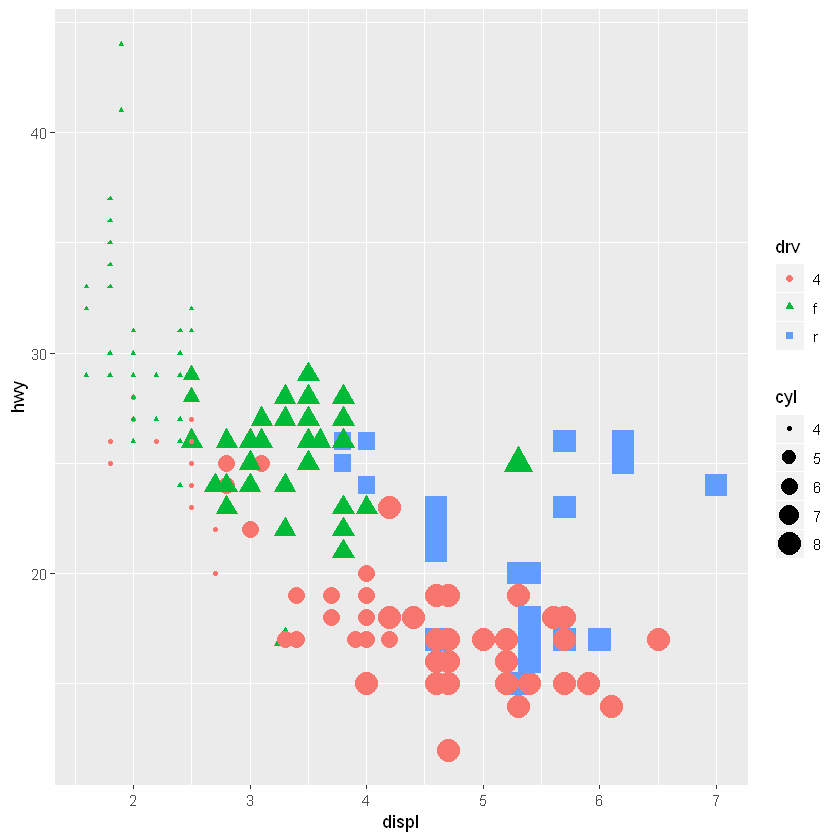

In [11]:
ggplot(data =mpg) +
  geom_point(mapping=aes(x=displ, y=hwy, color=drv,
                         shape=drv, size=cyl))

### 시각적 요소의 setting
+ 함수 aes() 밖에서 사용자가 원하는 값으로 지정
+ geom 함수의 입력 요소가 됨

### 시각적 요소 color, size, shape에 값 지정 법칙
+ color : 색깔을 나타내는 문자열 지정
+ size : 점 크기를 mmm 단위로 지정
+ shape : 점의 형태를 나타내는 0~26 사이의 숫자

+ 시각적 요소 color의 setting : 모든 점을 빨간 색으로

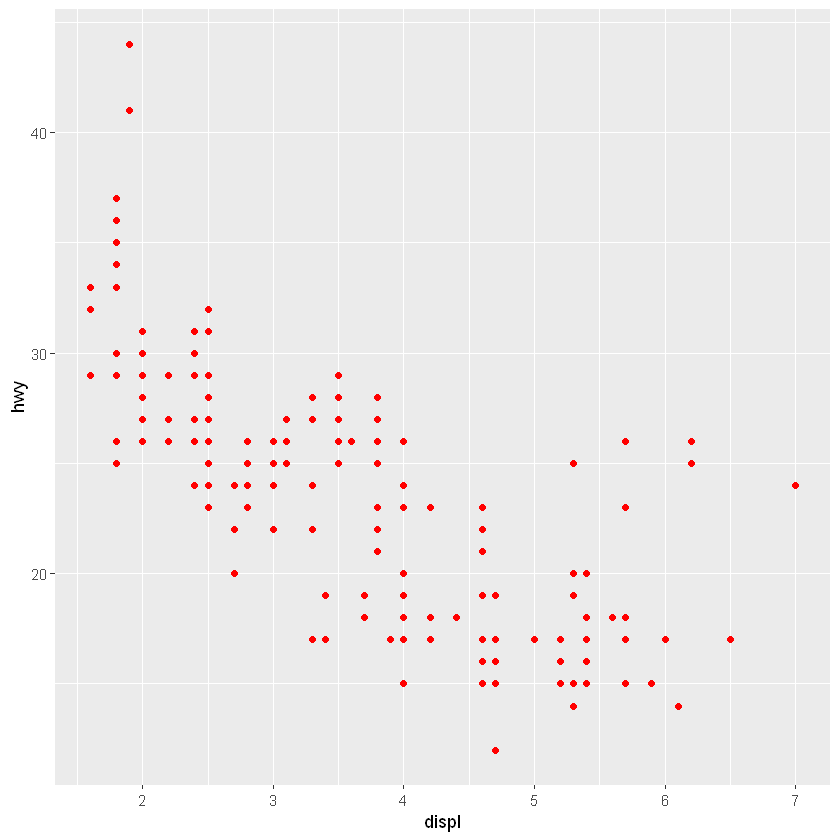

In [12]:
ggplot(data =mpg) +
  geom_point(mapping=aes(x=displ, y=hwy), color="red")

### 그룹별 그래프 작성 : Facet
+ 범주형 변수가 다른 변수에 미치는 영향력을 그래프로 확인하는 방법

### 함수 facet_wrap()에 의한 faceting
+ 데이터를 구분하는 변수가 하나인 경우 : facet_wrap(~ x)
+ 데이터 프레임 mpg의 변수 displ과 hwy의 산점도를 class의 범주별로 작성

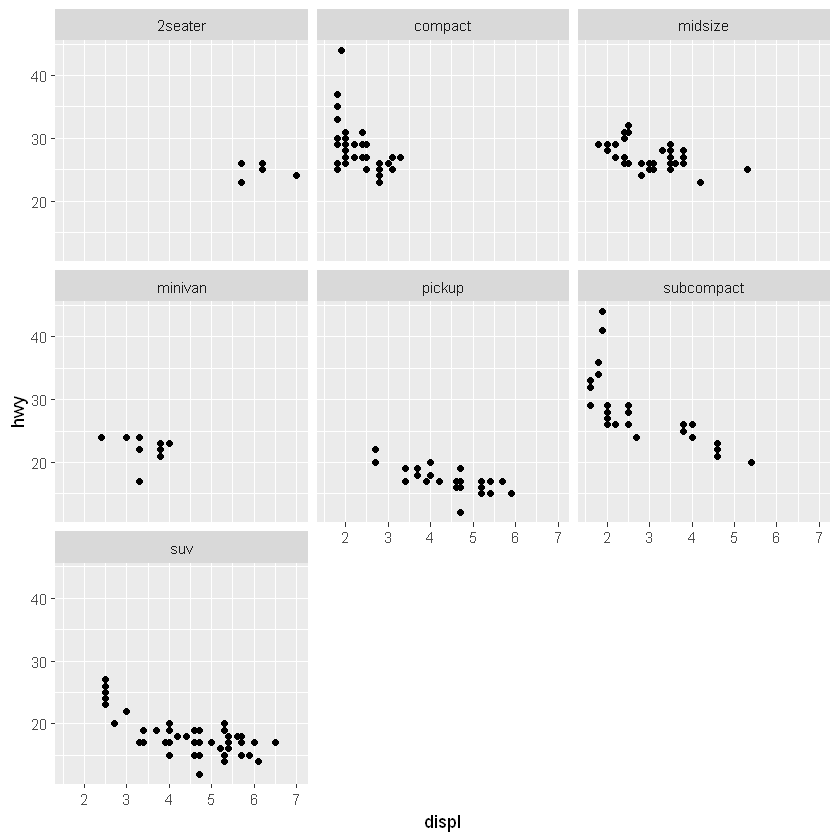

In [3]:
ggplot(data=mpg) + geom_point(mapping=aes(x=displ, y=hwy)) + facet_wrap(~ class)

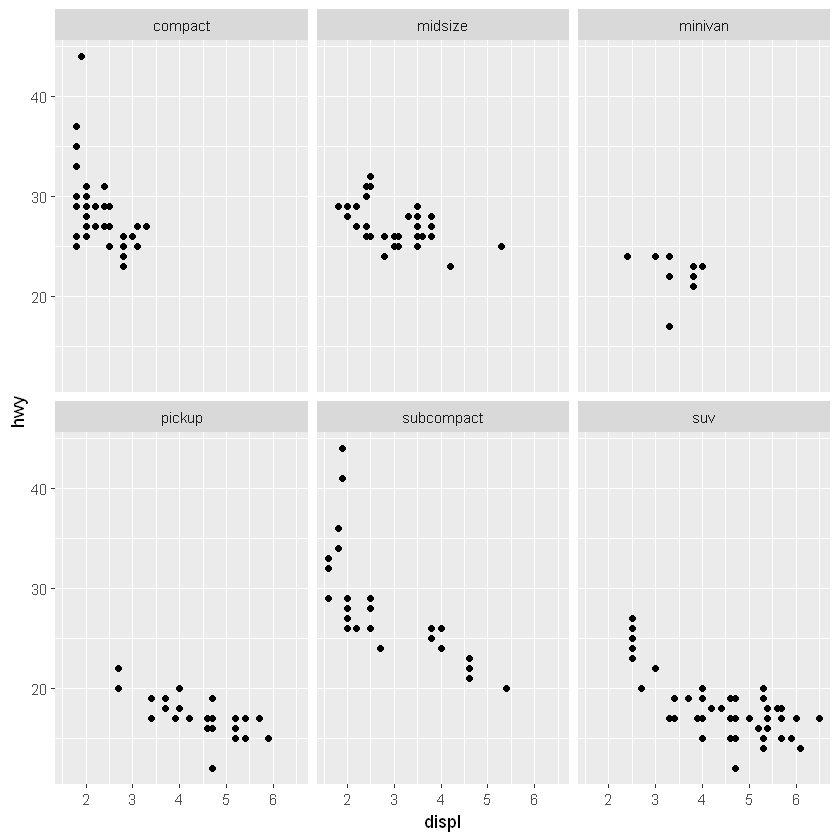

In [4]:
mpg %>% filter(class != "2seater") %>%
ggplot() + 
  geom_point(mapping=aes(x=displ, y=hwy)) + 
  facet_wrap(~ class)

### 패널 배치 조절
+ 2x3 패널 배치를 3x2 배치로 수정 : ncol =2
+ 패널에 그래프 배치 순서를 열 단위로 수정 : dir="v"

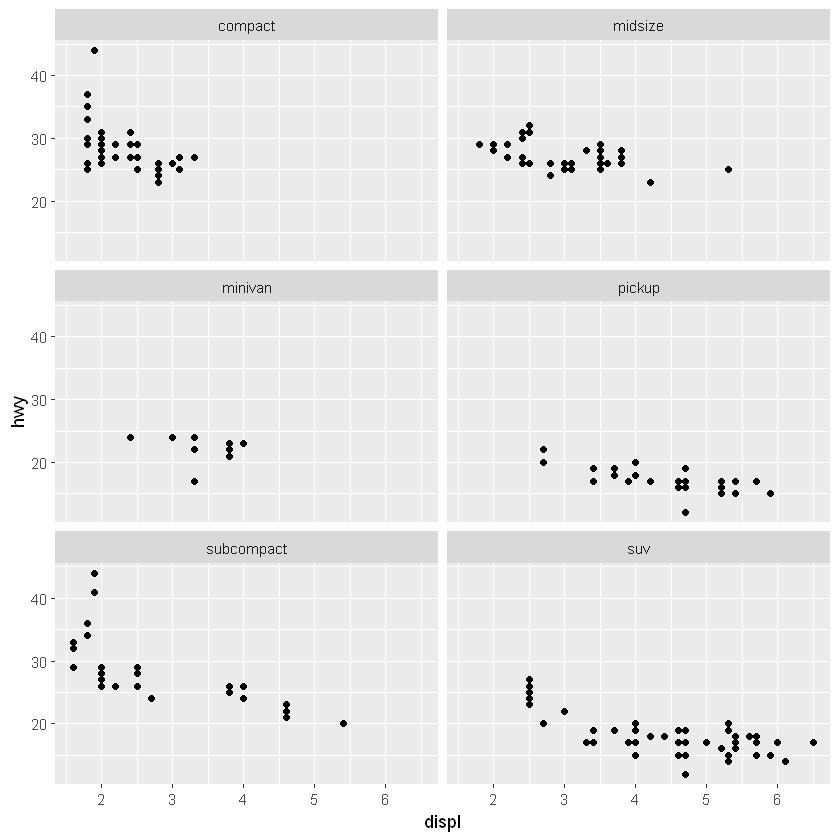

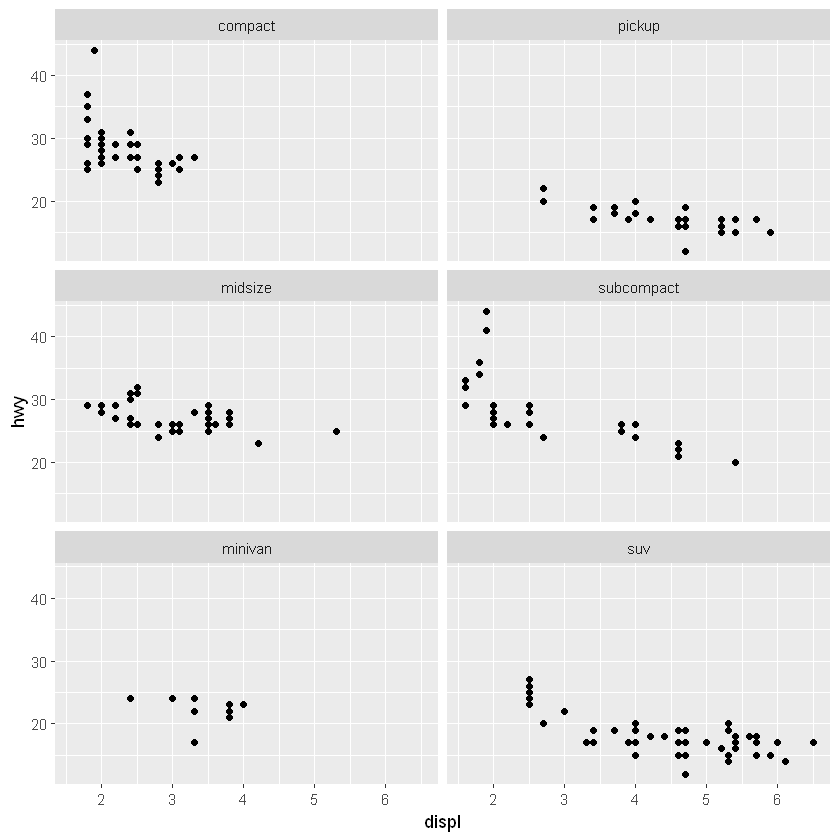

In [5]:
pp <- mpg %>%
  filter(class != "2seater") %>%
  ggplot() +
  geom_point(mapping=aes(x=displ, y=hwy))
pp + facet_wrap(~class, ncol=2)
pp + facet_wrap(~class, ncol=2, dir="v")

### 함수 facet_grid()에 의한 faceting
### 한 변수에 의한 faceting:
+ 하나의 행으로 패널 배치 :facet_grid(. ~ x)
+ 하나의 열로 패널 배치 : facet_grid(x ~ .)

+ 두 변수에 의한 faceting: facet_grid(y ~ x)


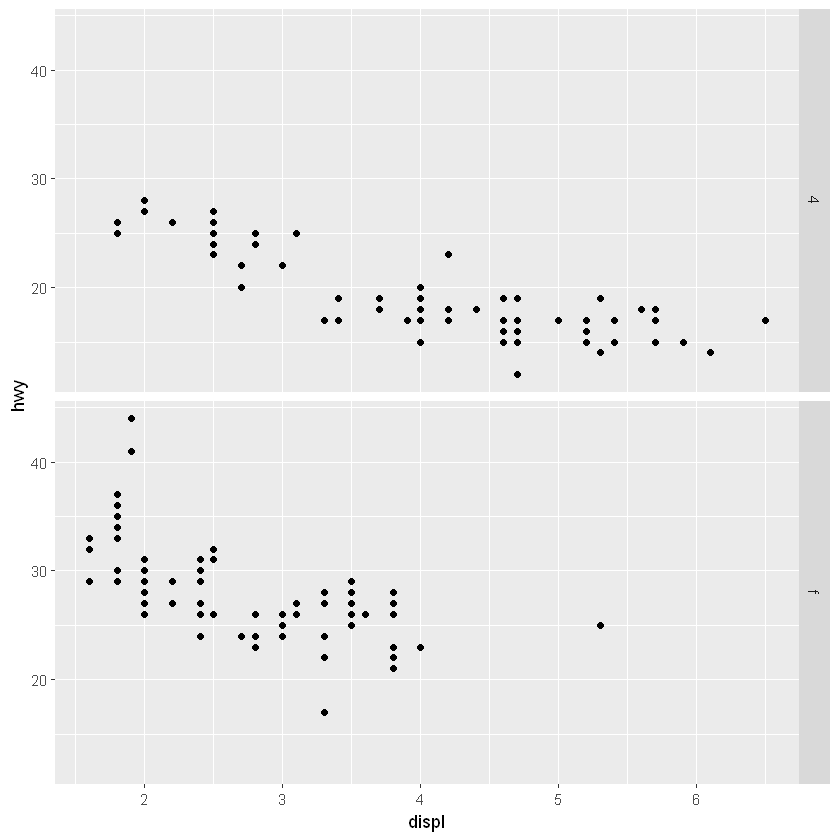

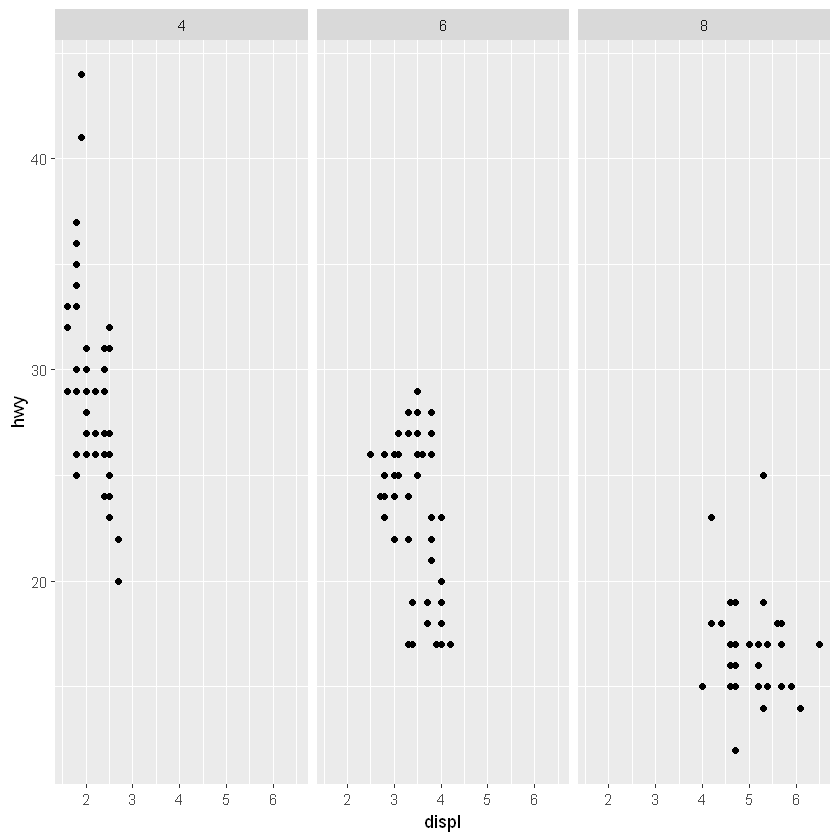

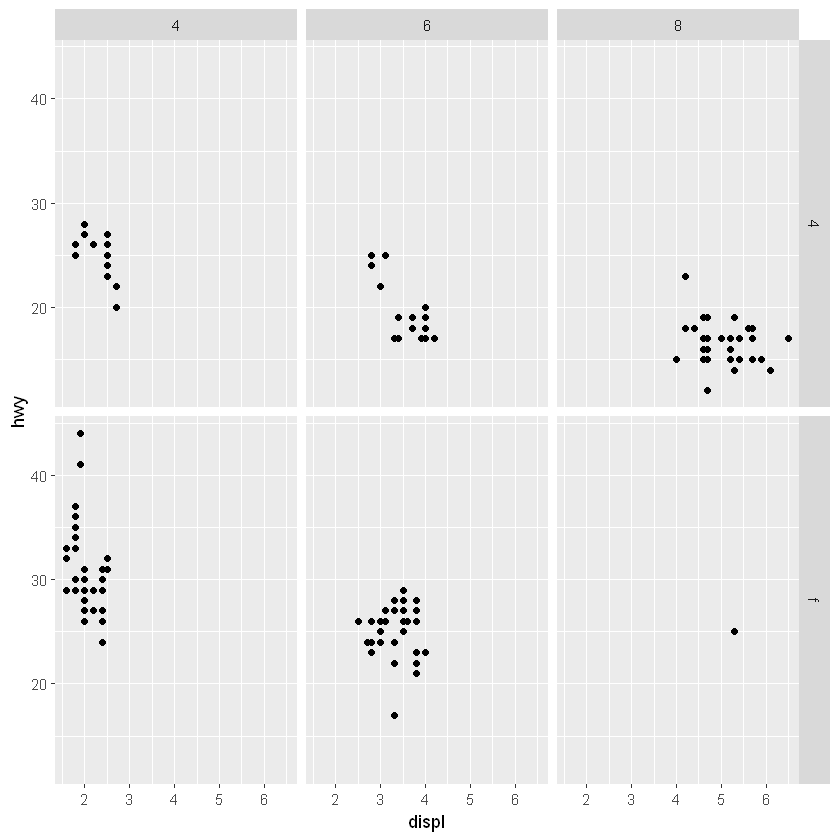

In [6]:
my_plot <- mpg %>%
  filter(cyl != 5, drv != "r") %>%
  ggplot() +
  geom_point(mapping=aes(x=displ, y=hwy))

my_plot + facet_grid(drv ~ .)
my_plot + facet_grid(. ~ cyl)
my_plot + facet_grid(drv ~ cyl)

### 연속형 변수에 의한 faceting
+ 연속형 변수를 범주형 변수로 변환 후 faceting
+ 유용한 함수
+ 1. cut_interval(x, n, length) : 벡터 x를 길이가 length인 n개의 구간으로 구분
+ 2. cut_width(x, width, boundary) : 벡터 x를 길이가 width인 구간으로 구분. 옵션 boundary는 구간의 시작점 지정.
+ 3. cut_number(x,n) : 벡터 x를 n개의 구간으로 구분하되 각 구간에 속한 데이터의 개수가 대략 동일하도록 구분

Warning message:
"Removed 42 rows containing missing values (geom_point)."


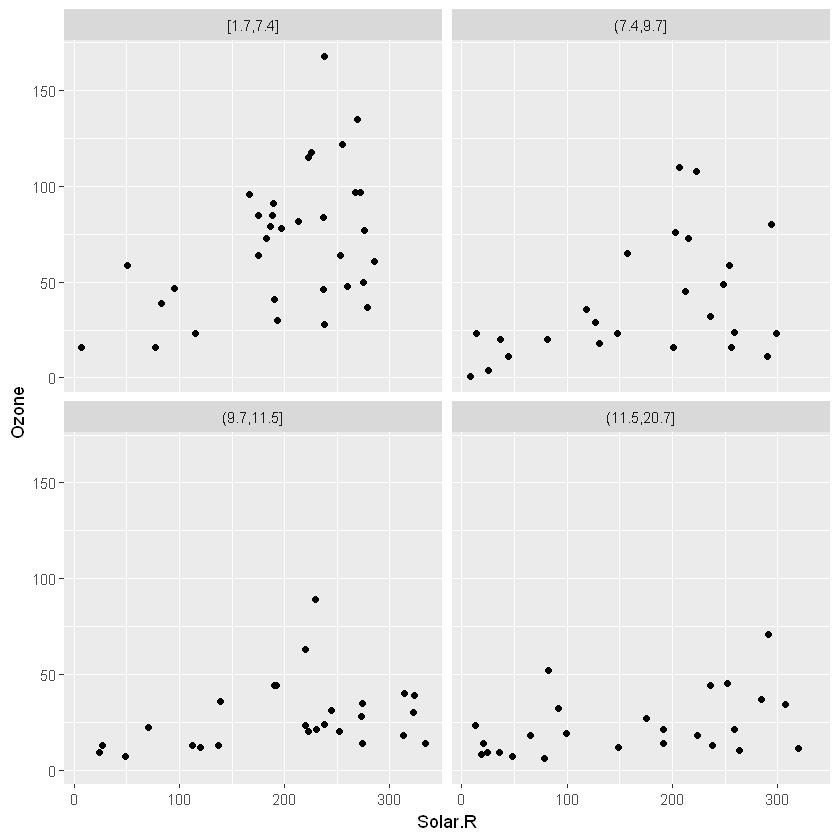

In [11]:
air_1 <-airquality %>% mutate(Wind_d = cut_number(Wind,4))
air_1 %>% ggplot() +
  geom_point(mapping=aes(x=Solar.R,y=Ozone)) +
  facet_wrap(~Wind_d)

Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Removed 42 rows containing missing values (geom_point)."


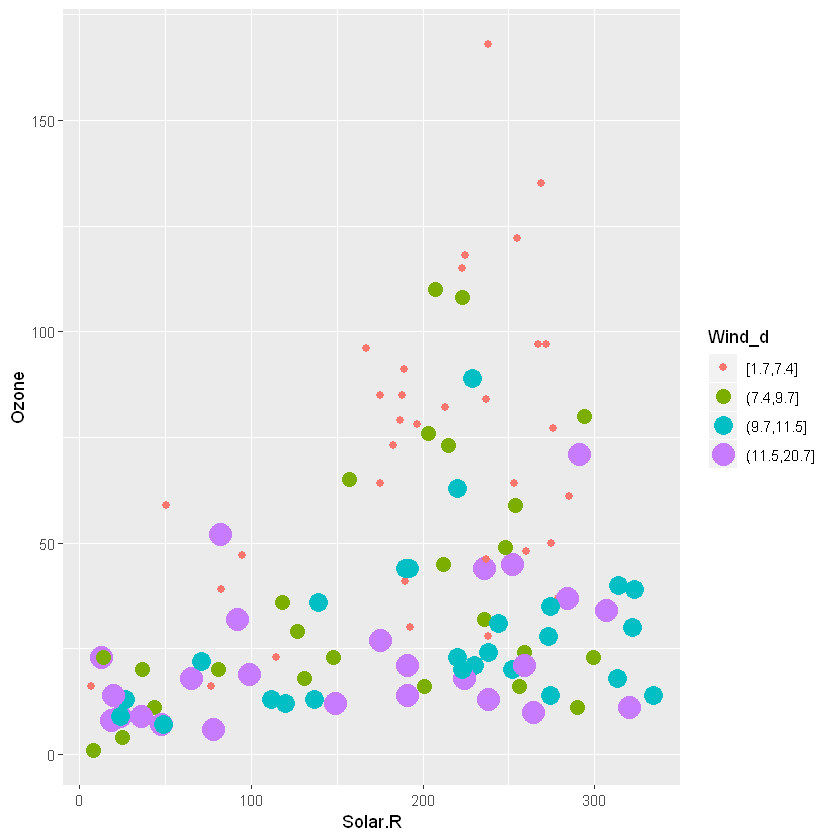

In [10]:
air_1 %>%
  ggplot() +
  geom_point(mapping=aes(x=Solar.R,y=Ozone, color=Wind_d,
                         size=Wind_d))